 BUSINESS UNDERSTANDING

Main Objective of the Project

The primary objective of this project is to analyze the funding trends in the Indian start-up ecosystem from 2018 to 2021. By examining the data, we aim to identify patterns, trends, and insights that can inform strategic decisions for entering the Indian start-up market. Specifically, we will focus on understanding the amount of funding received by start-ups, the types of investors involved, and the sectors that attract the most investment.

Key Research Questions
1. How has the total amount of funding received by start-ups in India changed from 2018 to 2021?
2. Which sectors have received the most funding in each year?
3. Who are the top investors in the Indian start-up ecosystem from 2018 to 2021?
4. Which regions or cities in India are receiving the most start-up funding?
5. Does the stage align with the investment timeline?
6. How long as the company been operating, and how does that affect the amount of investment?

Null Hypothesis (H0): There is no significant difference in the total amount of funding received by start-ups in India across the years 2018 to 2021.
Alternative Hypothesis (H1): There is significant difference in the total amount of funding received by start-ups in India across the years 2018 to 2021.


In [116]:
# import the pandas library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [67]:
# install pyodbc using pip
!pip install pyodbc


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [68]:
# install all the necessary libraries
from dotenv import dotenv_values
import warnings
import pyodbc
warnings.filterwarnings('ignore')

In [69]:
# the MySQL server details and credentials
server="dap-projects-database.database.windows.net"
login="LP1_learner"
password= "Hyp0th3s!$T3$t!ng"
database="dapDB"

In [70]:
environment_variables = dotenv_values('.env')
#Get the values for the credentials you set in the '.env' file
database = environment_variables.get("database")
server = environment_variables.get("server")
username = environment_variables.get("login")
password = environment_variables.get("password")
connection_string=f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}"




In [71]:
# Use the connect method of the pyodbc library and pass in the connection string.
# This will connect to the server and might take a few seconds to be complete. 
# Check your internet connection if it takes more time than necessary
connection=pyodbc.connect(connection_string)

In [72]:
# Now the sql query to get the data is what what you see below.
# Note that you will not have permissions to insert delete or update this database table. 

db_query = '''SELECT * 
FROM INFORMATION_SCHEMA.TABLES
WHERE TABLE_TYPE = 'BASE TABLE' '''

In [73]:
ata = pd.read_sql(db_query, connection)
ata

,TABLE_CATALOG,TABLE_SCHEMA,TABLE_NAME,TABLE_TYPE
0,dapDB,dbo,LP1_startup_funding2021,BASE TABLE
1,dapDB,dbo,LP1_startup_funding2020,BASE TABLE


DATASET ONE: DATA UNDERSTANDING

In [74]:
query = "select * from dbo.LP1_startup_funding2021"

ata = pd.read_sql(query, connection)
ata

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed
...,...,...,...,...,...,...,...,...,...
1204,Gigforce,2019.0,Gurugram,Staffing & Recruiting,A gig/on-demand staffing company.,"Chirag Mittal, Anirudh Syal",Endiya Partners,$3000000,Pre-series A
1205,Vahdam,2015.0,New Delhi,Food & Beverages,VAHDAM is among the world’s first vertically i...,Bala Sarda,IIFL AMC,$20000000,Series D
1206,Leap Finance,2019.0,Bangalore,Financial Services,International education loans for high potenti...,"Arnav Kumar, Vaibhav Singh",Owl Ventures,$55000000,Series C
1207,CollegeDekho,2015.0,Gurugram,EdTech,"Collegedekho.com is Student’s Partner, Friend ...",Ruchir Arora,"Winter Capital, ETS, Man Capital",$26000000,Series B


In [75]:
## lets view the shape of our dataset
ata.shape

## the dataframe has 1209 observations/rows and 9 columns

(1209, 9)

In [76]:
#checking the first five rows of the ata dataset
ata.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed


In [77]:
#the names of the columns in the dataset
print(ata.columns)

Index(['Company_Brand', 'Founded', 'HeadQuarter', 'Sector', 'What_it_does',
       'Founders', 'Investor', 'Amount', 'Stage'],
      dtype='object')


In [78]:
# descriptive statistics of the dataset
ata.describe().T

 ## by default, it will only pick the numeric columns

,count,mean,std,min,25%,50%,75%,max
Founded,1208.0,2016.655629,4.517364,1963.0,2015.0,2018.0,2020.0,2021.0


In [79]:
# Including summary of all columns
summary_all = ata.describe(include='all')
summary_all


,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
count,1209,1208.000000,1208,1209,1209,1205,1147,1206,781
unique,1033,NaN,70,254,1143,1095,937,278,31
top,BharatPe,NaN,Bangalore,FinTech,BharatPe develops a QR code-based payment app ...,"Ashneer Grover, Shashvat Nakrani",Inflection Point Ventures,$Undisclosed,Seed
freq,8,NaN,426,122,4,7,24,73,246
mean,NaN,2016.655629,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,4.517364,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,1963.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,2015.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,2018.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,2020.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [80]:
#the info() method provides a summary of the dataframe such as the datatypes, the structure and it also identifies potential irregularities
ata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1209 non-null   object 
 1   Founded        1208 non-null   float64
 2   HeadQuarter    1208 non-null   object 
 3   Sector         1209 non-null   object 
 4   What_it_does   1209 non-null   object 
 5   Founders       1205 non-null   object 
 6   Investor       1147 non-null   object 
 7   Amount         1206 non-null   object 
 8   Stage          781 non-null    object 
dtypes: float64(1), object(8)
memory usage: 85.1+ KB


DATA CLEANING

Handling Missing Data

In [81]:
#checking for missing data in the different columns of the dataset
ata.isnull().sum()


Company_Brand      0
Founded            1
HeadQuarter        1
Sector             0
What_it_does       0
Founders           4
Investor          62
Amount             3
Stage            428
dtype: int64

Fill Missing Values

In [82]:
# forward filling of missing values
# It is also known as propagation. 
# Each missing value will be replaced with the most recent non-missing value prior to it.
ata.fillna(method='ffill', inplace=True)  


In [83]:
# Verifying there are no more missing values in the dataframe
ata.isnull().sum()


Company_Brand    0
Founded          0
HeadQuarter      0
Sector           0
What_it_does     0
Founders         0
Investor         0
Amount           0
Stage            0
dtype: int64

In [84]:
ata

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",Pre-series A
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed
...,...,...,...,...,...,...,...,...,...
1204,Gigforce,2019.0,Gurugram,Staffing & Recruiting,A gig/on-demand staffing company.,"Chirag Mittal, Anirudh Syal",Endiya Partners,$3000000,Pre-series A
1205,Vahdam,2015.0,New Delhi,Food & Beverages,VAHDAM is among the world’s first vertically i...,Bala Sarda,IIFL AMC,$20000000,Series D
1206,Leap Finance,2019.0,Bangalore,Financial Services,International education loans for high potenti...,"Arnav Kumar, Vaibhav Singh",Owl Ventures,$55000000,Series C
1207,CollegeDekho,2015.0,Gurugram,EdTech,"Collegedekho.com is Student’s Partner, Friend ...",Ruchir Arora,"Winter Capital, ETS, Man Capital",$26000000,Series B


In [85]:
#Removing $ and , characters from the Amount column
ata["Amount"]

0         $1,200,000
1       $120,000,000
2        $30,000,000
3        $51,000,000
4         $2,000,000
            ...     
1204        $3000000
1205       $20000000
1206       $55000000
1207       $26000000
1208        $8000000
Name: Amount, Length: 1209, dtype: object

In [86]:
# remove $ signs
ata["Amount"] = ata.Amount.apply(lambda x:str(x).replace('$', ''))

In [87]:
# remove commas(,)
ata["Amount"] = ata.Amount.apply(lambda x:str(x).replace(',', ''))

In [88]:
#confirm if the characters have been removed
ata["Amount"]

0         1200000
1       120000000
2        30000000
3        51000000
4         2000000
          ...    
1204      3000000
1205     20000000
1206     55000000
1207     26000000
1208      8000000
Name: Amount, Length: 1209, dtype: object

HANDLING DUPLICATES

In [89]:
#Identify duplicate rows
print("Number of duplicate rows:")
print(ata.duplicated().sum())

Number of duplicate rows:
16


In [90]:
# Display duplicate rows
ata[ata.duplicated()]

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
110,Kirana247,2018.0,New Delhi,Logistics & Supply Chain,An on-demand FMCG supply chain company leverag...,"Tarun Jiwarajka, Pankhuri Jiwarajka",InvestCorp,1000000,Pre-series A
111,FanPlay,2020.0,Computer Games,Computer Games,A real money game app specializing in trivia g...,YC W21,"Pritesh Kumar, Bharat Gupta",Upsparks,$1200000
243,Trinkerr,2021.0,Bangalore,Capital Markets,Trinkerr is India's first social trading platf...,"Manvendra Singh, Gaurav Agarwal",Accel India,6600000,Series A
244,Zorro,2021.0,Gurugram,Social network,Pseudonymous social network platform,"Jasveer Singh, Abhishek Asthana, Deepak Kumar","Vijay Shekhar Sharma, Ritesh Agarwal, Ankiti Bose",32000000,Seed
245,Ultraviolette,2021.0,Bangalore,Automotive,Create and Inspire the future of sustainable u...,"Subramaniam Narayan, Niraj Rajmohan","TVS Motor, Zoho",150000000,Series C
246,NephroPlus,2009.0,Hyderabad,Hospital & Health Care,A vision and passion of redefining healthcare ...,Vikram Vuppala,IIFL Asset Management,24000000,Series E
247,Unremot,2020.0,Bangalore,Information Technology & Services,Unremot is a personal office for consultants!,Shiju Radhakrishnan,Inflection Point Ventures,700000,Seed
248,FanAnywhere,2021.0,Bangalore,Financial Services,Celebrity NFT platform,"Varun Chaudhary, Amit Kumar","Oasis Capital, Scorpio VC, DeltaHub Capital",Undisclosed,Seed
249,PingoLearn,2021.0,Pune,E-learning,PingoLearn offers language learning courses wi...,"Mohit Menghani, Shubham Maheshwari","Titan Capital, Haresh Chawla, AngelList Syndicate",200000,Seed
250,Spry,2021.0,Mumbai,Music,THE BEST ROYALTY-FREE MUSIC TO CREATE TRENDING...,"Gaurav Dagaonkar, Meghna Mittal","9Unicorns, Ashneer Grover",1500000,Seed


DATASET TWO: DATA UNDERSTANDING

In [91]:
query1 = "select * from dbo.LP1_startup_funding2020"
ata2 = pd.read_sql(query1, connection)
ata2

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,None
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,None
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,None
3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None,None
4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None,None
...,...,...,...,...,...,...,...,...,...,...
1050,Leverage Edu,NaN,Delhi,Edtech,AI enabled marketplace that provides career gu...,Akshay Chaturvedi,"DSG Consumer Partners, Blume Ventures",1500000.0,None,None
1051,EpiFi,NaN,None,Fintech,It offers customers with a single interface fo...,"Sujith Narayanan, Sumit Gwalani","Sequoia India, Ribbit Capital",13200000.0,Seed Round,None
1052,Purplle,2012.0,Mumbai,Cosmetics,Online makeup and beauty products retailer,"Manish Taneja, Rahul Dash",Verlinvest,8000000.0,None,None
1053,Shuttl,2015.0,Delhi,Transport,App based bus aggregator serice,"Amit Singh, Deepanshu Malviya",SIG Global India Fund LLP.,8043000.0,Series C,None


In [92]:
#dealing with missing data on the second dataset
ata2.isnull().sum()

Company_Brand       0
Founded           213
HeadQuarter        94
Sector             13
What_it_does        0
Founders           12
Investor           38
Amount            254
Stage             464
column10         1053
dtype: int64

In [93]:
#check for some information about the ata2 dataset
ata2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1055 non-null   object 
 1   Founded        842 non-null    float64
 2   HeadQuarter    961 non-null    object 
 3   Sector         1042 non-null   object 
 4   What_it_does   1055 non-null   object 
 5   Founders       1043 non-null   object 
 6   Investor       1017 non-null   object 
 7   Amount         801 non-null    float64
 8   Stage          591 non-null    object 
 9   column10       2 non-null      object 
dtypes: float64(2), object(8)
memory usage: 82.6+ KB


In [94]:
#describe the dataset
ata2.describe().T

,count,mean,std,min,25%,50%,75%,max
Founded,842.0,2.015363e+03,4.097909e+00,1973.0,2014.0,2016.0,2018.0,2.020000e+03
Amount,801.0,1.130430e+08,2.476635e+09,12700.0,1000000.0,3000000.0,11000000.0,7.000000e+10


Handling Missing Data

In [95]:
ata2.columns

Index(['Company_Brand', 'Founded', 'HeadQuarter', 'Sector', 'What_it_does',
       'Founders', 'Investor', 'Amount', 'Stage', 'column10'],
      dtype='object')

In [96]:

# Drop the column named 'column 10' from the DataFrame
ata2 = ata2.drop(columns=['column10'])

In [97]:
#checking the data types of each column
print("Data types for each column:")
print(ata2.dtypes)

Data types for each column:
Company_Brand     object
Founded          float64
HeadQuarter       object
Sector            object
What_it_does      object
Founders          object
Investor          object
Amount           float64
Stage             object
dtype: object


In [98]:
#Separate numeric (float) and object columns
float_cols = ata2.select_dtypes(include=['float']).columns
object_cols = ata2.select_dtypes(include=['object']).columns

In [99]:
#Fill missing data with the mean for float columns
ata2[float_cols] = ata2[float_cols].fillna(ata2[float_cols].median())

In [100]:
#Fill missing data with the mode for object columns
for col in object_cols:
    ata2[col] = ata2[col].fillna(ata2[col].mode()[0])

In [101]:
#Verify that missing data has been filled
print("\nColumns with missing data after filling:")
print(ata2.isnull().sum())


Columns with missing data after filling:
Company_Brand    0
Founded          0
HeadQuarter      0
Sector           0
What_it_does     0
Founders         0
Investor         0
Amount           0
Stage            0
dtype: int64


Handling Duplicates

In [102]:
#Identify duplicate rows
print("Number of duplicate rows:")
print(ata2.duplicated().sum())


Number of duplicate rows:
3


In [103]:
# Display duplicate rows
print("\nDuplicate rows:")
ata2[ata2.duplicated()]


Duplicate rows:


,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
145,Krimanshi,2015.0,Jodhpur,Biotechnology company,Krimanshi aims to increase rural income by imp...,Nikhil Bohra,"Rajasthan Venture Capital Fund, AIM Smart City",600000.0,Seed
205,Nykaa,2012.0,Mumbai,Cosmetics,Nykaa is an online marketplace for different b...,Falguni Nayar,"Alia Bhatt, Katrina Kaif",3000000.0,Series A
362,Byju’s,2011.0,Bangalore,EdTech,An Indian educational technology and online tu...,Byju Raveendran,"Owl Ventures, Tiger Global Management",500000000.0,Series A


In [ ]:
ata2

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,Series A
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,3000000.0,Pre-seed
3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,Series A
4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,Series A
...,...,...,...,...,...,...,...,...,...
1050,Leverage Edu,2016.0,Delhi,Edtech,AI enabled marketplace that provides career gu...,Akshay Chaturvedi,"DSG Consumer Partners, Blume Ventures",1500000.0,Series A
1051,EpiFi,2016.0,Bangalore,Fintech,It offers customers with a single interface fo...,"Sujith Narayanan, Sumit Gwalani","Sequoia India, Ribbit Capital",13200000.0,Seed Round
1052,Purplle,2012.0,Mumbai,Cosmetics,Online makeup and beauty products retailer,"Manish Taneja, Rahul Dash",Verlinvest,8000000.0,Series A
1053,Shuttl,2015.0,Delhi,Transport,App based bus aggregator serice,"Amit Singh, Deepanshu Malviya",SIG Global India Fund LLP.,8043000.0,Series C


,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,Series A
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,3000000.0,Pre-seed
3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,Series A
4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,Series A
...,...,...,...,...,...,...,...,...,...
1050,Leverage Edu,2016.0,Delhi,Edtech,AI enabled marketplace that provides career gu...,Akshay Chaturvedi,"DSG Consumer Partners, Blume Ventures",1500000.0,Series A
1051,EpiFi,2016.0,Bangalore,Fintech,It offers customers with a single interface fo...,"Sujith Narayanan, Sumit Gwalani","Sequoia India, Ribbit Capital",13200000.0,Seed Round
1052,Purplle,2012.0,Mumbai,Cosmetics,Online makeup and beauty products retailer,"Manish Taneja, Rahul Dash",Verlinvest,8000000.0,Series A
1053,Shuttl,2015.0,Delhi,Transport,App based bus aggregator serice,"Amit Singh, Deepanshu Malviya",SIG Global India Fund LLP.,8043000.0,Series C


In [ ]:
## the amount column in the second dataset is in scientific notation.
## let's change it to a float
ata2['Amount'] = ata2['Amount'].apply(lambda x: f'{x:.2f}')

In [ ]:
## Let's validate that the amount column has been transformed to a float format
ata2["Amount"]

0         200000.00
1         100000.00
2        3000000.00
3         400000.00
4         340000.00
           ...     
1050     1500000.00
1051    13200000.00
1052     8000000.00
1053     8043000.00
1054     9000000.00
Name: Amount, Length: 1055, dtype: object

DATASET THREE

In [ ]:
data1 = pd.read_csv("C:/Users/user/Downloads/startup_funding2018.csv")
data1

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...
...,...,...,...,...,...,...
521,Udaan,"B2B, Business Development, Internet, Marketplace",Series C,225000000,"Bangalore, Karnataka, India","Udaan is a B2B trade platform, designed specif..."
522,Happyeasygo Group,"Tourism, Travel",Series A,—,"Haryana, Haryana, India",HappyEasyGo is an online travel domain.
523,Mombay,"Food and Beverage, Food Delivery, Internet",Seed,7500,"Mumbai, Maharashtra, India",Mombay is a unique opportunity for housewives ...
524,Droni Tech,Information Technology,Seed,"₹35,000,000","Mumbai, Maharashtra, India",Droni Tech manufacture UAVs and develop softwa...


DATA UNDERSTANDING

In [ ]:
#Using the head() method to view the first five rows of the dataset
data1.head()

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...


In [ ]:
#using the info() method to get some understanding of the dataset
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company Name   526 non-null    object
 1   Industry       526 non-null    object
 2   Round/Series   526 non-null    object
 3   Amount         526 non-null    object
 4   Location       526 non-null    object
 5   About Company  526 non-null    object
dtypes: object(6)
memory usage: 24.8+ KB


In [ ]:
#using the describ() method
data1.describe().T

,count,unique,top,freq
Company Name,526,525,TheCollegeFever,2
Industry,526,405,—,30
Round/Series,526,21,Seed,280
Amount,526,198,—,148
Location,526,50,"Bangalore, Karnataka, India",102
About Company,526,524,"TheCollegeFever is a hub for fun, fiesta and f...",2


In [ ]:
data1["Amount"]

##remember to change the Ruppees to U.S dollars

0           250000
1      ₹40,000,000
2      ₹65,000,000
3          2000000
4                —
          ...     
521      225000000
522              —
523           7500
524    ₹35,000,000
525       35000000
Name: Amount, Length: 526, dtype: object

HANDLING MISSING DATA

In [ ]:
#checking for missing data
data1.isnull().sum()

#the dataset has 0 missing data

Company Name     0
Industry         0
Round/Series     0
Amount           0
Location         0
About Company    0
dtype: int64

HANDLING DUPLICATES

In [ ]:
#Identify duplicate rows
print("Number of duplicate rows:")
print(data1.duplicated().sum())

Number of duplicate rows:
1


In [ ]:
# Display duplicate rows
print("\nDuplicate rows:")
print(data1[data1.duplicated()])


Duplicate rows:
        Company Name                                           Industry  \
348  TheCollegeFever  Brand Marketing, Event Promotion, Marketing, S...   

    Round/Series  Amount                     Location  \
348         Seed  250000  Bangalore, Karnataka, India   

                                         About Company  
348  TheCollegeFever is a hub for fun, fiesta and f...  


In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company Name   526 non-null    object
 1   Industry       526 non-null    object
 2   Round/Series   526 non-null    object
 3   Amount         526 non-null    object
 4   Location       526 non-null    object
 5   About Company  526 non-null    object
dtypes: object(6)
memory usage: 24.8+ KB


In [ ]:
ata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1209 non-null   object 
 1   Founded        1209 non-null   float64
 2   HeadQuarter    1209 non-null   object 
 3   Sector         1209 non-null   object 
 4   What_it_does   1209 non-null   object 
 5   Founders       1209 non-null   object 
 6   Investor       1209 non-null   object 
 7   Amount         1209 non-null   object 
 8   Stage          1209 non-null   object 
dtypes: float64(1), object(8)
memory usage: 85.1+ KB


In [ ]:
##Rename some columns to enable easy combination
data3 = data1.rename(columns = {'Company Name': 'Company_Brand', 'Industry': 'Sector', 'Location': 'HeadQuater', 'About Company': 'What_it_does', 'Round/Series': 'Stage'})


In [ ]:
data3

,Company_Brand,Sector,Stage,Amount,HeadQuater,What_it_does
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...
...,...,...,...,...,...,...
521,Udaan,"B2B, Business Development, Internet, Marketplace",Series C,225000000,"Bangalore, Karnataka, India","Udaan is a B2B trade platform, designed specif..."
522,Happyeasygo Group,"Tourism, Travel",Series A,—,"Haryana, Haryana, India",HappyEasyGo is an online travel domain.
523,Mombay,"Food and Beverage, Food Delivery, Internet",Seed,7500,"Mumbai, Maharashtra, India",Mombay is a unique opportunity for housewives ...
524,Droni Tech,Information Technology,Seed,"₹35,000,000","Mumbai, Maharashtra, India",Droni Tech manufacture UAVs and develop softwa...


Dataset Four Data Understanding

In [ ]:
data2 = pd.read_csv("C:/Users/user/Downloads/startup_funding2019.csv")
data2

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN
...,...,...,...,...,...,...,...,...,...
84,Infra.Market,NaN,Mumbai,Infratech,It connects client requirements to their suppl...,"Aaditya Sharda, Souvik Sengupta","Tiger Global, Nexus Venture Partners, Accel Pa...","$20,000,000",Series A
85,Oyo,2013.0,Gurugram,Hospitality,Provides rooms for comfortable stay,Ritesh Agarwal,"MyPreferred Transformation, Avendus Finance, S...","$693,000,000",NaN
86,GoMechanic,2016.0,Delhi,Automobile & Technology,Find automobile repair and maintenance service...,"Amit Bhasin, Kushal Karwa, Nitin Rana, Rishabh...",Sequoia Capital,"$5,000,000",Series B
87,Spinny,2015.0,Delhi,Automobile,Online car retailer,"Niraj Singh, Ramanshu Mahaur, Ganesh Pawar, Mo...","Norwest Venture Partners, General Catalyst, Fu...","$50,000,000",NaN


In [ ]:
data2.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN


In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  89 non-null     object 
 1   Founded        60 non-null     float64
 2   HeadQuarter    70 non-null     object 
 3   Sector         84 non-null     object 
 4   What it does   89 non-null     object 
 5   Founders       86 non-null     object 
 6   Investor       89 non-null     object 
 7   Amount($)      89 non-null     object 
 8   Stage          43 non-null     object 
dtypes: float64(1), object(8)
memory usage: 6.4+ KB


In [ ]:
data2.describe().T

,count,mean,std,min,25%,50%,75%,max
Founded,60.0,2014.533333,2.937003,2004.0,2013.0,2015.0,2016.25,2019.0


HANDLING MISSING DATA

In [ ]:
#Check for missing data
data2.isnull().sum()

Company/Brand     0
Founded          29
HeadQuarter      19
Sector            5
What it does      0
Founders          3
Investor          0
Amount($)         0
Stage            46
dtype: int64

In [ ]:

#Separate numeric (float) and object columns
float_cols = data2.select_dtypes(include=['float']).columns
object_cols = data2.select_dtypes(include=['object']).columns

#Fill missing data with the mean for float columns
data2[float_cols] = data2[float_cols].fillna(data2[float_cols].mean())

#Fill missing data with the mode for object columns
for col in object_cols:
    data2[col] = data2[col].fillna(data2[col].mode()[0])

#Verify that missing data has been filled
print("\nColumns with missing data after filling:")
print(data2.isnull().sum())



Columns with missing data after filling:
Company/Brand    0
Founded          0
HeadQuarter      0
Sector           0
What it does     0
Founders         0
Investor         0
Amount($)        0
Stage            0
dtype: int64


HANDLING DUPLICATES

In [ ]:
#Identify duplicate rows
print("Number of duplicate rows:")
print(data2.duplicated().sum())

#the dataset has no duplicates

Number of duplicate rows:
0


In [ ]:
## Rename columns in data2
data4= data2.rename(columns={'Amount($)':'Amount', 'Company/Brand':'Company_Brand'})
data4

,Company_Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount,Stage
0,Bombay Shaving,2014.533333,Bangalore,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",Series A
1,Ruangguru,2014.000000,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,2014.533333,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
3,HomeLane,2014.000000,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D
4,Nu Genes,2004.000000,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",Series A
...,...,...,...,...,...,...,...,...,...
84,Infra.Market,2014.533333,Mumbai,Infratech,It connects client requirements to their suppl...,"Aaditya Sharda, Souvik Sengupta","Tiger Global, Nexus Venture Partners, Accel Pa...","$20,000,000",Series A
85,Oyo,2013.000000,Gurugram,Hospitality,Provides rooms for comfortable stay,Ritesh Agarwal,"MyPreferred Transformation, Avendus Finance, S...","$693,000,000",Series A
86,GoMechanic,2016.000000,Delhi,Automobile & Technology,Find automobile repair and maintenance service...,"Amit Bhasin, Kushal Karwa, Nitin Rana, Rishabh...",Sequoia Capital,"$5,000,000",Series B
87,Spinny,2015.000000,Delhi,Automobile,Online car retailer,"Niraj Singh, Ramanshu Mahaur, Ganesh Pawar, Mo...","Norwest Venture Partners, General Catalyst, Fu...","$50,000,000",Series A


COMBINING THE DATASETS

In [ ]:
# Concatenate DataFrames
dataset = pd.concat([ata, ata2, data3,data4], axis=0, ignore_index=True)



In [ ]:
dataset

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,HeadQuater,What it does
0,Unbox Robotics,2019.000000,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First",1200000,Pre-series A,NaN,NaN
1,upGrad,2015.000000,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management",120000000,Pre-series A,NaN,NaN
2,Lead School,2012.000000,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital",30000000,Series D,NaN,NaN
3,Bizongo,2015.000000,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital",51000000,Series C,NaN,NaN
4,FypMoney,2021.000000,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal",2000000,Seed,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2874,Infra.Market,2014.533333,Mumbai,Infratech,NaN,"Aaditya Sharda, Souvik Sengupta","Tiger Global, Nexus Venture Partners, Accel Pa...","$20,000,000",Series A,NaN,It connects client requirements to their suppl...
2875,Oyo,2013.000000,Gurugram,Hospitality,NaN,Ritesh Agarwal,"MyPreferred Transformation, Avendus Finance, S...","$693,000,000",Series A,NaN,Provides rooms for comfortable stay
2876,GoMechanic,2016.000000,Delhi,Automobile & Technology,NaN,"Amit Bhasin, Kushal Karwa, Nitin Rana, Rishabh...",Sequoia Capital,"$5,000,000",Series B,NaN,Find automobile repair and maintenance service...
2877,Spinny,2015.000000,Delhi,Automobile,NaN,"Niraj Singh, Ramanshu Mahaur, Ganesh Pawar, Mo...","Norwest Venture Partners, General Catalyst, Fu...","$50,000,000",Series A,NaN,Online car retailer


In [105]:
##check for missing values
dataset.isnull().any()

Company_Brand    False
Founded           True
HeadQuarter       True
Sector           False
What_it_does      True
Founders          True
Investor          True
Amount           False
Stage            False
HeadQuater        True
What it does      True
dtype: bool

In [106]:
# check for the number of missing values using the sum() function
dataset.isnull().sum()

Company_Brand       0
Founded           526
HeadQuarter       526
Sector              0
What_it_does       89
Founders          526
Investor          526
Amount              0
Stage               0
HeadQuater       2353
What it does     2790
dtype: int64

In [107]:
# Drop columns in positions 9 and 10 (zero-indexed, so columns 10th and 11th)
columns_to_drop = [9, 10]
df = dataset.drop(dataset.columns[columns_to_drop], axis=1)
df

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019.000000,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First",1200000,Pre-series A
1,upGrad,2015.000000,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management",120000000,Pre-series A
2,Lead School,2012.000000,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital",30000000,Series D
3,Bizongo,2015.000000,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital",51000000,Series C
4,FypMoney,2021.000000,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal",2000000,Seed
...,...,...,...,...,...,...,...,...,...
2874,Infra.Market,2014.533333,Mumbai,Infratech,NaN,"Aaditya Sharda, Souvik Sengupta","Tiger Global, Nexus Venture Partners, Accel Pa...","$20,000,000",Series A
2875,Oyo,2013.000000,Gurugram,Hospitality,NaN,Ritesh Agarwal,"MyPreferred Transformation, Avendus Finance, S...","$693,000,000",Series A
2876,GoMechanic,2016.000000,Delhi,Automobile & Technology,NaN,"Amit Bhasin, Kushal Karwa, Nitin Rana, Rishabh...",Sequoia Capital,"$5,000,000",Series B
2877,Spinny,2015.000000,Delhi,Automobile,NaN,"Niraj Singh, Ramanshu Mahaur, Ganesh Pawar, Mo...","Norwest Venture Partners, General Catalyst, Fu...","$50,000,000",Series A


In [110]:
# check missing values
df.isnull().sum()

Company_Brand      0
Founded          526
HeadQuarter      526
Sector             0
What_it_does      89
Founders         526
Investor         526
Amount             0
Stage              0
dtype: int64

In [113]:
df_cleaned = df.dropna()

In [114]:
df_cleaned.isnull().sum()

Company_Brand    0
Founded          0
HeadQuarter      0
Sector           0
What_it_does     0
Founders         0
Investor         0
Amount           0
Stage            0
dtype: int64

In [117]:
df_cleaned

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First",1200000,Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management",120000000,Pre-series A
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital",30000000,Series D
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital",51000000,Series C
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal",2000000,Seed
...,...,...,...,...,...,...,...,...,...
2259,Leverage Edu,2016.0,Delhi,Edtech,AI enabled marketplace that provides career gu...,Akshay Chaturvedi,"DSG Consumer Partners, Blume Ventures",1500000.00,Series A
2260,EpiFi,2016.0,Bangalore,Fintech,It offers customers with a single interface fo...,"Sujith Narayanan, Sumit Gwalani","Sequoia India, Ribbit Capital",13200000.00,Seed Round
2261,Purplle,2012.0,Mumbai,Cosmetics,Online makeup and beauty products retailer,"Manish Taneja, Rahul Dash",Verlinvest,8000000.00,Series A
2262,Shuttl,2015.0,Delhi,Transport,App based bus aggregator serice,"Amit Singh, Deepanshu Malviya",SIG Global India Fund LLP.,8043000.00,Series C


HYPOTHESIS TESTING

(H0): There is no significant difference in the total amount of funding received by start-ups in India across the years 2018 to 2021.

(H1): There is significant difference in the total amount of funding received by start-ups in India across the years 2018 to 2021.

Research Question One: How has the total amount of funding received by start-ups in India changed from 2018 to 2021?
•	Which sectors have received the most funding in each year?
•	Who are the top investors in the Indian start-up ecosystem from 2018 to 2021?
•	Which regions or cities in India are receiving the most start-up funding?


Question One: Compare the total funding amout recieved by different sectors

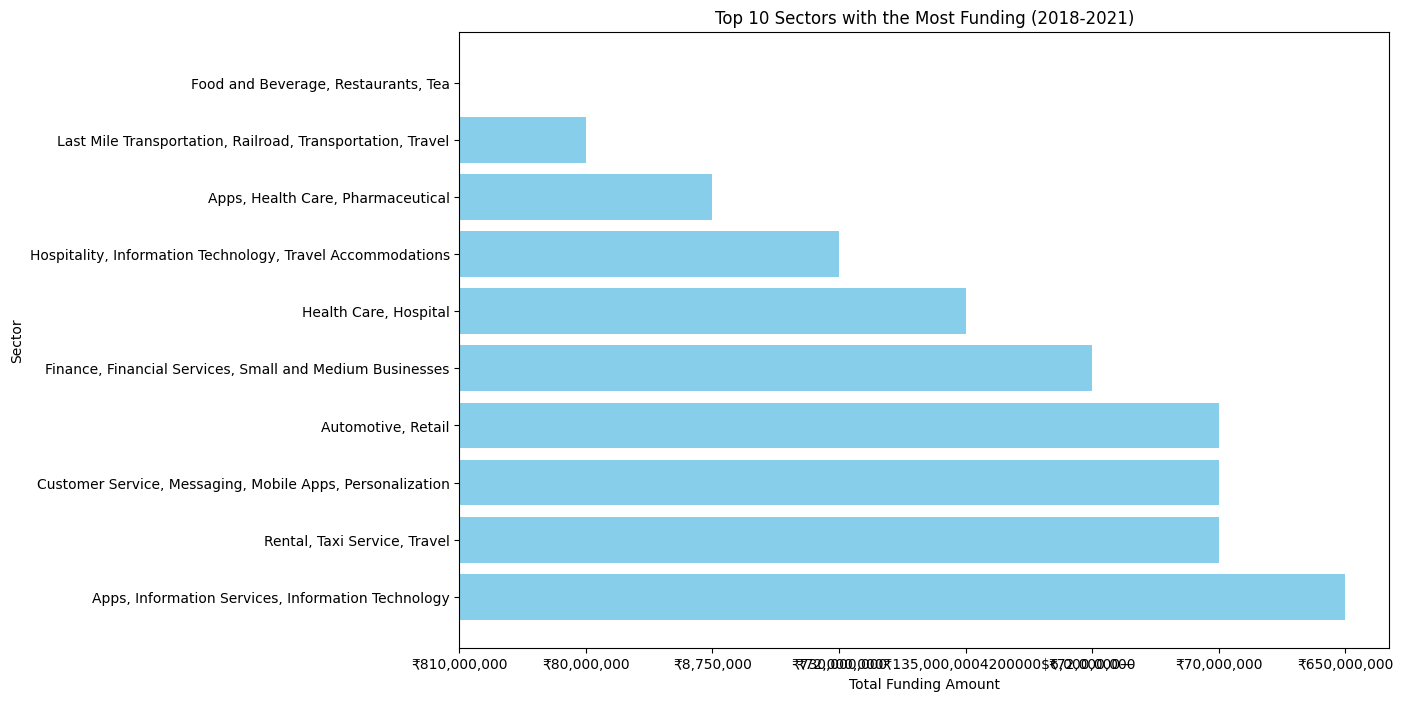

In [119]:
# Group by sector and sum the funding amounts
sector_funding = df.groupby('Sector')['Amount'].sum().reset_index()

# Sort the sectors by total funding amount in descending order
sector_funding = sector_funding.sort_values(by='Amount', ascending=False)

# Select the top 10 sectors with the most funding
top_sectors = sector_funding.head(10)

# Plotting
plt.figure(figsize=(12, 8))
plt.barh(top_sectors['Sector'], top_sectors['Amount'], color='skyblue')
plt.xlabel('Total Funding Amount')
plt.ylabel('Sector')
plt.title('Top 10 Sectors with the Most Funding (2018-2021)')
plt.gca().invert_yaxis()  # Invert y-axis to show the highest funding at the top
plt.show()